In [1]:
import os
from functools import partial

import numpy
import scipy
from matplotlib import pyplot

import lebesgue
import pyhf_stuff


from pyhf_stuff import models, limit, region, fit_mcmc_mix, fit_signal

In [2]:
BASE = "/home/tombs/Cambridge/interval-evidence/searches/ins1852821/SR0bvetotight/fit/"
NDATA = 1

In [3]:
def test2():
    region_name_to_scan = {
        "SR0breq": (0, 20),
        "SR0bvetoloose": (0, 40),
        "SR0bvetotight": (0, 20),
        "SR0ZZbvetoloose": (0, 20),
        "SR0ZZbvetotight": (0, 30),
        "SR0ZZloose": (0, 200),
        "SR0ZZtight": (0, 30),
        "SR1breq": (0, 20),
        "SR1bvetoloose": (0, 20),
        "SR1bvetotight": (0, 10),
        "SR2breq": (0, 10),
        "SR2bvetoloose": (0, 30),
        "SR2bvetotight": (0, 20),
    }

    def doscan(ndata, partial_model, lo, hi, nbins=200, rtol=1e-3):
        return limit.scan(
            partial_model,
            ndata,
            lo,
            hi,
            nbins + 1,
            rtol=rtol,
        )

    path_format = "/home/tombs/Cambridge/interval-evidence/searches/ins1852821/%s"
    
    for name, (lo, hi) in region_name_to_scan.items():
        path = path_format % name
        region_i = region.Region.load(path)
        ndata = region_i.ndata
        
        fit = fit_mcmc_mix.FitMcmcMix.load(os.path.join(path, "fit"))
        partial_model = models.mcmc(fit)
        model_temp = partial_model(0)
        
        expected_trio = [
            limit.quantile(model_temp.prior, q)
            for q in limit.standard_normal_cdf([-1, 0, 1])
        ]
        
        print(name)
        for n in (ndata, *expected_trio):
            scan = doscan(n, partial_model, lo, hi)
            print("%.2f: %r" % (n, scan.points))
        
        # fit signal scan
        signal = fit_signal.FitSignal.load(os.path.join(path, "fit"))
        scan_fit_signal = limit.scan_fit_signal(signal)
        print("fit : %r" % scan_fit_signal.points)
        print()

test2()

SR0breq
3.00: [[5.387987021562005], [7.839885878250923], [11.320447199453174]]
0.91: [[1.1412064240214492], [3.2367719669034596], [6.208593246622894]]
1.31: [[1.6603356531818327], [3.9413431732441215], [7.071264629979349]]
1.76: [[2.4357498348136537], [4.835678997602597], [8.102494729066287]]
fit : [[0.3486203089988018, 3.905834775735568], [6.7428621609077295], [10.382728342567777]]

SR0bvetoloose
11.00: [[2.763334341814866], [7.36386810935371], [12.71272456165517]]
11.19: [[2.8842701378950157], [7.54837460598888], [12.938200145955786]]
14.06: [[5.520540922591974], [10.777708571188237], [16.63022756000846]]
18.58: [[12.397658181078338], [17.435060894258548], [23.541583987225216]]
fit : [[3.823252238298787], [8.484078817914735], [13.78094047381547]]

SR0bvetotight
1.00: [[0.8475310837896555], [2.880979271092375], [5.853663696503812]]
2.26: [[1.5879923946959194], [4.260807305635669], [7.7304408634508786]]
4.02: [[3.4970045809441714], [6.696762356434506], [10.647383149304668]]
6.85: [[8.1

1
[0.5, 2.0, 4.5]
[[0.8475310837896555], [2.880979271092375], [5.853663696503812]]


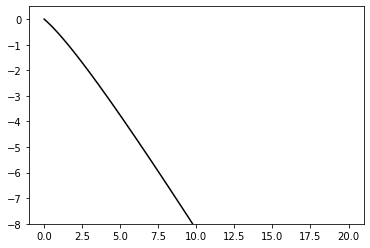

2.2625646591186523
[0.5, 2.0, 4.5]
[[1.5879923946959194], [4.260807305635669], [7.7304408634508786]]


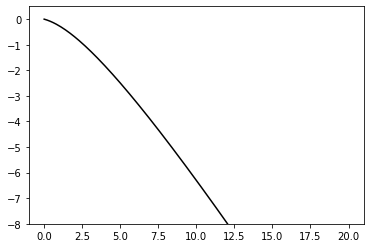

4.01718807220459
[0.5, 2.0, 4.5]
[[3.4970045809441714], [6.696762356434506], [10.647383149304668]]


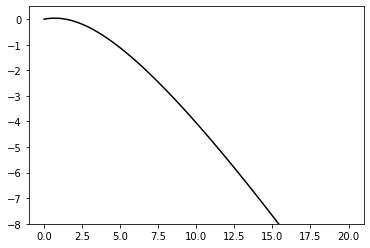

6.850037574768066
[0.5, 2.0, 4.5]
[[8.19754855290061], [11.522175743472436], [15.869974087634969]]


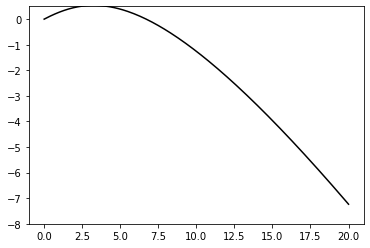

CPU times: user 1.67 s, sys: 622 ms, total: 2.29 s
Wall time: 1.46 s


In [4]:
def test():
    fit = fit_mcmc_mix.FitMcmcMix.load(BASE)
    partial_model = models.mcmc(fit)
    model_temp = partial_model(0)
    
    expected_trio = [
        limit.quantile(model_temp.prior, q)
        for q in limit.standard_normal_cdf([-1, 0, 1])
    ]
    
    def doscan(ndata):
        print(ndata)
        scan = limit.scan(
            partial_model,
            ndata,
            0,
            20,
            201,
            rtol=1e-3,
        )
        
        print(scan.levels)
        print(scan.points)
        
        log_ratios = limit.log_ratio(scan.integrals, scan.integral_zero)
        pyplot.plot(
            numpy.linspace(scan.start, scan.stop, len(scan.integrals)),
            log_ratios,
            "k",
        )
        pyplot.ylim(-8, 0.5)
        pyplot.show()
        
    doscan(NDATA)
    for ndata in expected_trio:
        doscan(ndata)
    
%time test()